In [6]:
'''Find the pupil-edge in an image of the eye, using sckits-image

Author: Thomas Haslwanter
Date:   May-2015
Ver:    1.1

'''

# Import standard modules
%pylab inline
import os

# Modules for reading in an image from the web
import sys
if sys.version[0] == 3:
    from urllib.request import urlopen
    from io import BytesIO
else:
    from urllib2 import urlopen
    from StringIO import StringIO
    print('Working with Python 2')

import PIL

# Modules for image processing
import skimage 
from skimage.morphology import disk
from skimage import filters
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib
Working with Python 2


In [7]:
# Function to quickly show images in graylevel
set_cmap('gray')

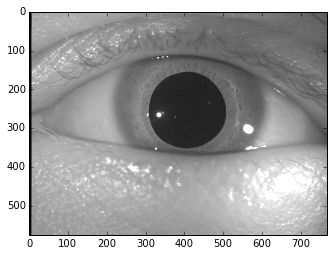

In [8]:
'''Get the data
This is a bit complicated, because I have two options:
- locally, or from the Web
- Python 2, or Python 3 (different handling of URLs, and of strings/bytes)
'''

fromWeb = False
if fromWeb:
    url = 'http://work.thaslwanter.at/CSS/Code/0_5.bmp'
    if sys.version[0] == 3:        
        file = BytesIO(urlopen(url).read())        
    else:
        file = StringIO(urlopen(url).read())        
    data = array(PIL.Image.open(file))
else:
    data = imread('..\..\Images\eye.bmp')
    
imshow(data)

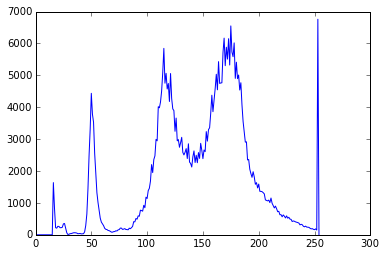

In [9]:
# Calculate and show the histogram
histo = histogram(data, bins=np.arange(0,256))
# Note the number of data is one less than the number of box-edges for the histogram
plot(histo[1][:-1], histo[0])
show()

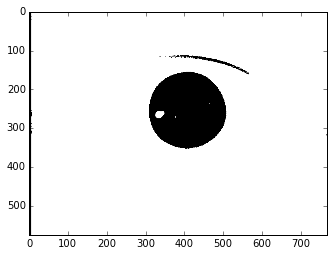

In [10]:
# Convert to black-and-white
# for convenience, I choose the threshold automatically
bw = data>80
imshow(bw)

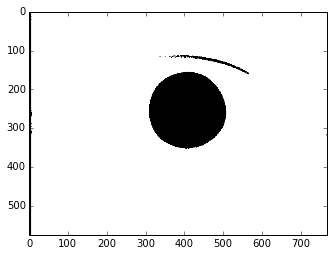

In [11]:
# Fill the holes
filled = np.invert(ndimage.binary_fill_holes(np.invert(bw)))
imshow(filled)

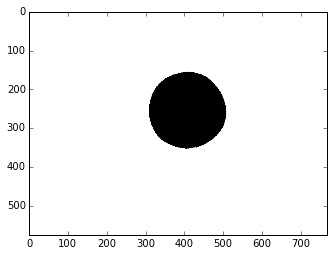

In [12]:
se = disk(10)
closed = skimage.morphology.closing(filled, se)
imshow(closed)

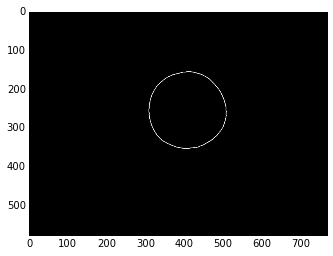

In [13]:
edges = filters.sobel(closed)
imshow(edges)